#### Load the required libraries and read data from Online retail excel file

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sn
%matplotlib inline

In [2]:
Retail_df = pd.read_excel("Online Retail.xlsx")


In [3]:
Retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [95]:
Retail_df.shape

(541909, 10)

In [88]:
Retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   Total_Price  541909 non-null  float64       
 9   Date         541909 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 41.3+ MB


#### Convert the series invoice date data in datetime format and count the unique number of attributes

In [11]:
#Convert the date in YYYY-mm-dd HH:MM format and store that date in 'Date' column
Retail_df['Date']=pd.to_datetime(Retail_df['InvoiceDate'], format = '%Y-%m-%d %H:%M:%S')
#Retail_df['Date']=Retail_df['Date'].apply(lambda x: x.strftime('%Y-%d-%m %H:%M'))

# Count the unique no of attributes in Retail data
def unique_counts(Retail_df):
   for i in Retail_df.columns:
       count = Retail_df[i].nunique()
       print(i, ": ", count)
unique_counts(Retail_df)


InvoiceNo :  25900
StockCode :  4070
Description :  4223
Quantity :  722
InvoiceDate :  23260
UnitPrice :  1630
CustomerID :  4372
Country :  38
Total_Price :  6204
Date :  23260


#### Calculate Total Price by multiplying units and quantity and store that value in separate column Total_Price

In [12]:

Retail_df['Total_Price']=Retail_df['Quantity']*Retail_df['UnitPrice']
Retail_df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00


In [97]:
print(Retail_df.isna().sum()/541909)

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
Total_Price    0.000000
Date           0.000000
dtype: float64


#### Only consider rows without NaN values and store the data in dataset Online_retail_df

In [21]:

Online_retail_df = Retail_df[np.isfinite(Retail_df['CustomerID'])]


In [92]:
Online_retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   Total_Price  406829 non-null  float64       
 9   Date         406829 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 34.1+ MB


In [93]:
Online_retail_df.shape

(406829, 10)


#### Count the unique no of attributes in Retail data

In [22]:

unique_counts(Online_retail_df)

InvoiceNo :  22190
StockCode :  3684
Description :  3896
Quantity :  436
InvoiceDate :  20460
UnitPrice :  620
CustomerID :  4372
Country :  37
Total_Price :  4041
Date :  20460


In [112]:
a = Online_retail_df["Quantity"] >=0
a.value_counts()

True     397924
False      8905
Name: Quantity, dtype: int64

In [23]:
#For the sake of calculating recency and frequency, drop the rows with negative values of Quantity and store the data in final_df
final_retail = Online_retail_df[Online_retail_df['Quantity'] > 0]

In [24]:
final_retail.shape

(397924, 10)

In [25]:
unique_counts(final_retail)

InvoiceNo :  18536
StockCode :  3665
Description :  3877
Quantity :  302
InvoiceDate :  17286
UnitPrice :  441
CustomerID :  4339
Country :  37
Total_Price :  2940
Date :  17286


In [26]:
type(final_retail['Date'].max())

pandas._libs.tslibs.timestamps.Timestamp

In [27]:
final_retail['Date'].min()

Timestamp('2010-12-01 08:26:00')

### Q5.a ) Calculate RFM value of each customer
#### Assumption: In this final dataset , I have removed all the transaction with negative quantity value

In [28]:
#Calculate recency and frequency
import datetime as dt
NOW = dt.datetime(2011,12,10)


In [29]:
rfmTable = final_retail.groupby('CustomerID').agg({'Date': lambda x: (NOW - x.max()).days, 'InvoiceNo': lambda x: len(x),'Total_Price': lambda x: x.sum()})
rfmTable['Date'] = rfmTable['Date'].astype(int)
rfmTable.rename(columns={'Date': 'recency', 
                         'InvoiceNo': 'frequency',
                       'Total_Price': 'monetary_value'}, inplace=True)

In [30]:
#rfmTable = pd.merge(mTable, rfTable, on="CustomerID",how = 'inner')
rfmTable.shape


(4339, 3)

In [31]:
rfmTable.head(10)

,recency,frequency,monetary_value
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40
12352.0,36,85,2506.04
12353.0,204,4,89.00
12354.0,232,58,1079.40
12355.0,214,13,459.40


### Q35.b) Fing top 10 customers based on frequency and monetary values
#### Sorting first on frequency and then on Monetary value

In [32]:
rfmTable.sort_values(['frequency', 'monetary_value'], ascending=[False, False], inplace=True)

#### Below are top ten customers after sorting

In [33]:

rfmTable.head(10)


,recency,frequency,monetary_value
CustomerID,,,
17841.0,1,7847,40991.57
14911.0,1,5677,143825.06
14096.0,4,5111,65164.79
12748.0,0,4596,33719.73
14606.0,1,2700,12156.65
15311.0,0,2379,60767.90
14646.0,1,2080,280206.02
13089.0,2,1818,58825.83
13263.0,1,1677,7454.07


### Q5.c)Find optimal number of segments usig dendograms and elbow methods

#### Seggregate the brands into 6 segments

### Normalising the features

In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform( rfmTable )

In [63]:
clusters = KMeans(6)  # 6 clusters
clusters.fit( X_scaled )

KMeans(n_clusters=6)

In [64]:
import random
random.seed(9008)
X_sample = np.array(random.sample(X_scaled.tolist(),20))
#type(X_scaled)

In [113]:
clusters.labels_

array([2, 2, 2, ..., 1, 1, 0])

In [65]:
rfmTable["cluster_new"] = clusters.labels_

In [66]:
rfmTable
type(X_scaled)

numpy.ndarray

In [67]:
rfmTable.groupby('cluster_new' ).mean()

,recency,frequency,monetary_value,cluster_label
cluster_new,,,,
0,44.909278,65.018900,1230.691094,1.983505
1,249.167932,27.782732,532.079081,0.000000
2,1.500000,5807.750000,70925.287500,1.000000
3,15.928977,396.196023,7262.422500,1.994318
4,29.133333,926.200000,68421.666000,1.533333
5,2.250000,712.750000,225721.652500,1.000000


In [68]:
#Dendogram built with random samples from X_scaled

In [69]:
rfmTable.drop( 'cluster_new', axis = 1, inplace = True )

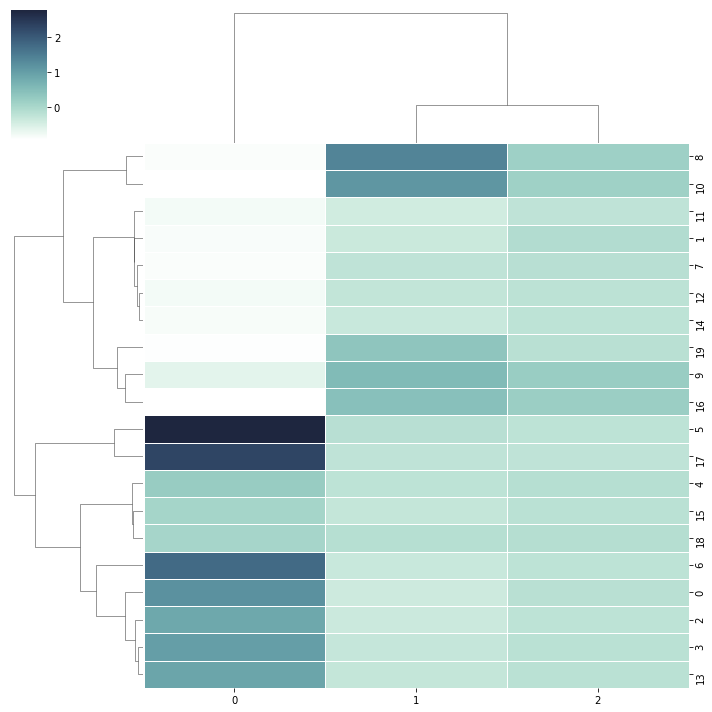

In [70]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
g = sn.clustermap(X_sample, cmap=cmap, linewidths=.5)


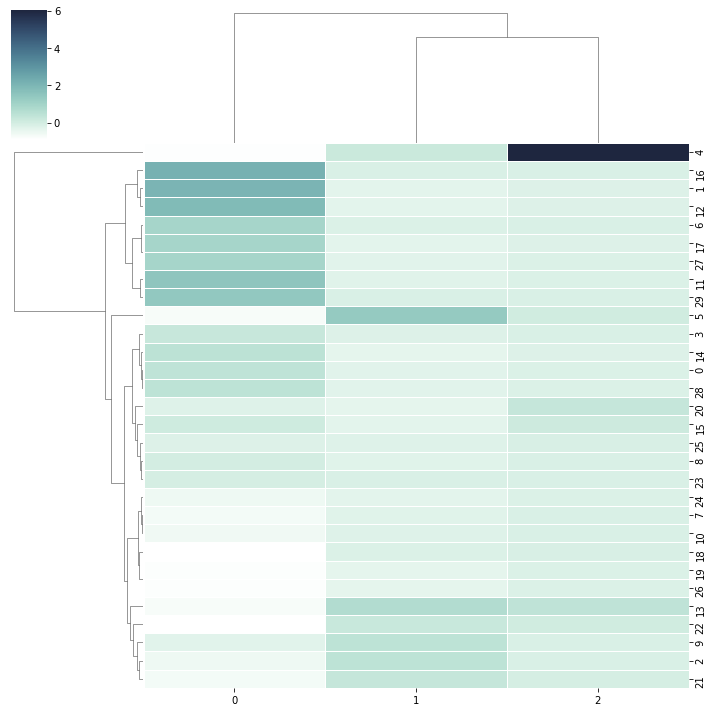

In [71]:
#Lets take one more sample to validate dendogram
random.seed(9005)
X_sample = np.array(random.sample(X_scaled.tolist(),30))
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
g = sn.clustermap(X_sample, cmap=cmap, linewidths=.5)

### The dendogram shows there are 3-6 disctinct clusters.
###  I have taken a random sample of 20-30 data points to build dendogram

### Consider Elbow method to verify the cluster segmentation

In [72]:
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )

In [73]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [114]:

clusters_df.head(10)

,num_clusters,cluster_errors
0,1,13017.000000
1,2,8996.762762
2,3,5453.122485
3,4,4006.929727
4,5,2958.445965
5,6,2371.441752
6,7,1923.476802
7,8,1674.481982
8,9,1492.726271


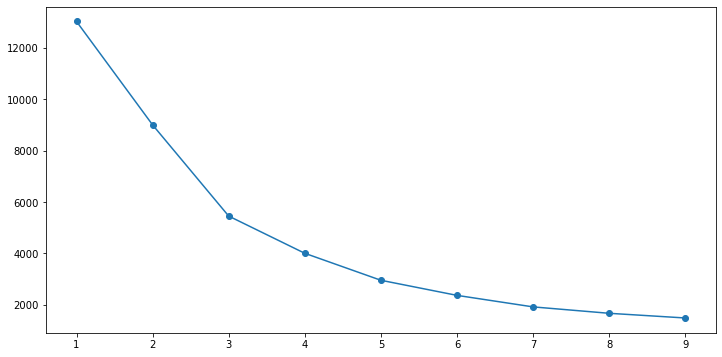

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [76]:
clusters = KMeans(6)  # 3 clusters
clusters.fit( X_scaled )
rfmTable["cluster_label"] = clusters.labels_

In [77]:
rfmTable.groupby('cluster_label').mean()

,recency,frequency,monetary_value
cluster_label,,,
0,44.860082,65.302126,1241.690334
1,1.500000,5807.750000,70925.287500
2,249.181387,27.799620,490.291596
3,2.250000,712.750000,225721.652500
4,15.783237,407.118497,7187.906012
5,43.250000,705.312500,68797.412500


In [78]:
rfmTable_0 = rfmTable[rfmTable.cluster_label == 0]

In [79]:
rfmTable_0.head(10)

,recency,frequency,monetary_value,cluster_label
CustomerID,,,,
14472.0,103,281,1936.84,0
15834.0,70,273,2233.75,0
16728.0,46,269,1054.67,0
17126.0,152,260,1004.75,0
14449.0,18,258,907.10,0
15532.0,25,256,1580.93,0
16771.0,33,255,2246.81,0
14810.0,40,255,2087.88,0
17589.0,60,253,2404.17,0


### All the customers with high recency and low frequency and low monetary value are segmented in this cluster.These are the least profitable customers for the company.

In [80]:
rfmTable_1 = rfmTable[rfmTable.cluster_label == 1]
rfmTable_1.head(10)

,recency,frequency,monetary_value,cluster_label
CustomerID,,,,
17841.0,1,7847,40991.57,1
14911.0,1,5677,143825.06,1
14096.0,4,5111,65164.79,1
12748.0,0,4596,33719.73,1


#### Each customer is assigned with the cluster label.
#### This cluster has customers that are potential customers with decent frequency and monetary value.Company should work towards them to convert them to most profitable customers

In [81]:
rfmTable_2 = rfmTable[rfmTable.cluster_label == 2]
rfmTable_2.head(10)

,recency,frequency,monetary_value,cluster_label
CustomerID,,,,
17850.0,372,297,5391.21,2
15644.0,166,238,813.00,2
14573.0,179,235,1653.42,2
15808.0,306,208,3734.97,2
15379.0,169,194,3703.29,2
17341.0,156,183,781.36,2
17472.0,191,181,710.29,2
14669.0,241,170,1269.99,2
15574.0,177,168,702.25,2


#### Each customer is assigned with the cluster label.
#### All the customers with low recency and high frequency and and monetary value are segmented in this Cluster .These are the most profitable and highly valued customers company should look at.


In [123]:
rfmTable_3 = rfmTable[rfmTable.cluster_label == 3]
rfmTable_3.head(10)

,recency,frequency,monetary_value,cluster_label
CustomerID,,,,
14646.0,1,2080,280206.02,3
18102.0,0,431,259657.30,3
17450.0,8,337,194550.79,3
16446.0,0,3,168472.50,3


In [124]:
rfmTable_4 = rfmTable[rfmTable.cluster_label == 4]
rfmTable_4.head(10)

,recency,frequency,monetary_value,cluster_label
CustomerID,,,,
14606.0,1,2700,12156.65,4
13263.0,1,1677,7454.07,4
15039.0,9,1502,19914.44,4
18118.0,10,1279,5653.82,4
14159.0,19,1204,4693.01,4
14796.0,1,1141,8022.49,4
16033.0,5,1137,8816.40,4
15005.0,15,1119,6316.57,4
14056.0,1,1106,8214.65,4


In [126]:
rfmTable_5 = rfmTable[rfmTable.cluster_label == 5]
rfmTable_5.head(10)

,recency,frequency,monetary_value,cluster_label
CustomerID,,,,
15311.0,0,2379,60767.90,5
13089.0,2,1818,58825.83,5
14298.0,8,1637,51527.30,5
14156.0,9,1400,117379.63,5
17511.0,2,963,91062.38,5
12415.0,24,716,124914.53,5
14088.0,10,589,50491.81,5
13694.0,3,568,65039.62,5
15061.0,3,403,54534.14,5


In [127]:
rfmTable_0.mean()

recency             44.860082
frequency           65.302126
monetary_value    1241.690334
cluster_label        0.000000
dtype: float64

In [128]:
rfmTable_1.mean()

recency               1.5000
frequency          5807.7500
monetary_value    70925.2875
cluster_label         1.0000
dtype: float64

In [129]:
rfmTable_2.mean()

recency              43.2500
frequency           705.3125
monetary_value    68797.4125
cluster_label         5.0000
dtype: float64

In [130]:
rfmTable_3.mean()

recency                2.2500
frequency            712.7500
monetary_value    225721.6525
cluster_label          3.0000
dtype: float64

In [132]:
rfmTable_4.mean()

recency             15.783237
frequency          407.118497
monetary_value    7187.906012
cluster_label        4.000000
dtype: float64

In [133]:
rfmTable_5.mean()

recency              43.2500
frequency           705.3125
monetary_value    68797.4125
cluster_label         5.0000
dtype: float64